In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from pandasql import sqldf # pip install pandasql

pysqldf = lambda q: sqldf(q, globals())

In [2]:
session_key = 9888

qualificacao_key = 9884

In [3]:
# Carrega os dados das voltas

def converter_listas_para_string(dados):
  dados_processados = []

  for i in dados:
      novo_item = i.copy()

      for chave, valor in novo_item.items():
          if isinstance(valor, list):
              novo_item[chave] = str(valor)

      dados_processados.append(novo_item)

  return dados_processados

url_session = f"https://api.openf1.org/v1/laps?session_key={session_key}"
resposta_session = requests.get(url_session)
resposta_session.status_code

if resposta_session.status_code == 200:
  dados_voltas = resposta_session.json()
  dados_processados = converter_listas_para_string(dados_voltas)
  df_voltas = pd.DataFrame(dados_processados)
else:
  print(f"Erro na requisição: {resposta_session.status_code}")

df_voltas

,meeting_key,session_key,driver_number,lap_number,date_start,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,is_pit_out_lap,lap_duration,segments_sector_1,segments_sector_2,segments_sector_3,st_speed
0,1271,9888,1,1,None,NaN,39.777,33.041,221.0,178,False,NaN,"[2048, 2049, 2049, 2049, 2051, 2051]","[2051, 2051, 2049, 2051, 2049, 2049, 2049, 2051]","[2051, 2051, 2049, 2049, 2051, 2051, 2051, 2051]",301
1,1271,9888,16,1,None,NaN,40.220,33.272,207.0,175,False,NaN,"[2048, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2051, 2049, 2049, 2051, 2051]",301
2,1271,9888,4,1,None,NaN,40.436,33.432,207.0,178,False,NaN,"[2048, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2051, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2051, 2049, 2049, 2049, 2049, 2049]",303
3,1271,9888,44,1,None,NaN,40.721,33.679,201.0,178,False,NaN,"[2048, 2049, 2051, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2051, 2051]",302
4,1271,9888,81,1,None,NaN,40.876,33.932,197.0,179,False,NaN,"[2048, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]",308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,1271,9888,18,56,2025-10-19T20:37:15.828000+00:00,26.473,39.588,33.389,211.0,185,False,99.450,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2049, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",310
1063,1271,9888,12,56,2025-10-19T20:37:17.106000+00:00,26.392,39.430,33.262,223.0,186,False,99.084,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2049, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",313
1064,1271,9888,23,56,2025-10-19T20:37:22.047000+00:00,26.200,39.250,33.027,NaN,183,False,98.477,"[None, 2048, 2048, 2048, 2048, 2048]","[2049, 2048, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",313
1065,1271,9888,31,56,2025-10-19T20:37:23.817000+00:00,26.353,40.051,33.283,226.0,183,False,99.687,"[2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",307


In [4]:
# Carrega os dados dos pilotos

url_piloto = f"https://api.openf1.org/v1/drivers?session_key={session_key}"
resposta_piloto = requests.get(url_piloto)
resposta_piloto.status_code

if resposta_piloto.status_code == 200:
  dados_piloto = resposta_piloto.json()
  df_piloto = pd.DataFrame(dados_piloto)
  df_piloto_final = df_piloto[['driver_number', 'name_acronym', 'team_colour']].copy()
  # Adicionar # ao campo de cores
  df_piloto_final['team_colour'] = '#' + df_piloto_final['team_colour']
else:
  print(f"Erro na requisição: {resposta_piloto.status_code}")

df_piloto_final

,driver_number,name_acronym,team_colour
0,1,VER,#4781D7
1,4,NOR,#F47600
2,5,BOR,#01C00E
3,6,HAD,#6C98FF
4,10,GAS,#00A1E8
5,12,ANT,#00D7B6
6,14,ALO,#229971
7,16,LEC,#ED1131
8,18,STR,#229971
9,22,TSU,#4781D7


In [5]:
# Carrega os dados de posição de chegada no grid

url = f"https://api.openf1.org/v1/session_result?session_key={session_key}"
resposta_position = requests.get(url)

if resposta_position.status_code == 200:
    df_posicao = pd.DataFrame(resposta_position.json())
    posicoes_finais = df_posicao.groupby('driver_number')['position'].last().sort_values()
    df_posicoes_finais = pd.DataFrame(posicoes_finais)
else:
    print(f"Erro: {resposta_position.status_code}")

df_posicoes_finais

,position
driver_number,
1,1.0
4,2.0
16,3.0
44,4.0
81,5.0
63,6.0
22,7.0
27,8.0
87,9.0


In [6]:
# Carrega os dados de qualificação

url_qualificacao = f"https://api.openf1.org/v1/starting_grid?session_key={qualificacao_key}"
resposta_qualificacao = requests.get(url_qualificacao)
resposta_qualificacao.status_code

if resposta_qualificacao.status_code == 200:
  dados_qualificacao = resposta_qualificacao.json()
  df_qualificacao = pd.DataFrame(dados_qualificacao)
else:
  print(f"Erro na requisição: {resposta_qualificacao.status_code}")

df_qualificacao

,position,driver_number,lap_duration,meeting_key,session_key
0,1,1,92.510,1271,9884
1,2,4,92.801,1271,9884
2,3,16,92.807,1271,9884
3,4,63,92.826,1271,9884
4,5,44,92.912,1271,9884
5,6,81,93.084,1271,9884
6,7,12,93.114,1271,9884
7,8,87,93.139,1271,9884
8,9,55,93.150,1271,9884
9,10,14,93.160,1271,9884


In [8]:
consulta_1 = """

with w_pf_voltas as (
  select
    *
  from
    df_voltas
), w_pf_piloto as (
  select
    *
  from
    df_piloto_final
), w_df_posicoes_finais as (
  select
    driver_number,
    position as position_final
  from
    df_posicoes_finais
)
select
  w1.driver_number,
  w1.lap_number,
  w1.lap_duration,
  w2.name_acronym,
  w2.team_colour,
  w3.position_final,
  avg(w1.lap_duration) over (partition by w1.driver_number) as tempo_medio_volta
from
  w_pf_voltas w1,
  w_pf_piloto w2,
  w_df_posicoes_finais w3
where
  w1.driver_number = w2.driver_number
  and w1.driver_number = w3.driver_number

"""

voltas_final = sqldf(consulta_1, locals())
df_voltas_final = pd.DataFrame(voltas_final)
df_voltas_final

,driver_number,lap_number,lap_duration,name_acronym,team_colour,position_final,tempo_medio_volta
0,1,1,NaN,VER,#4781D7,1.0,100.726345
1,1,2,100.241,VER,#4781D7,1.0,100.726345
2,1,3,100.069,VER,#4781D7,1.0,100.726345
3,1,4,99.758,VER,#4781D7,1.0,100.726345
4,1,5,100.310,VER,#4781D7,1.0,100.726345
...,...,...,...,...,...,...,...
1062,87,52,99.195,BEA,#9C9FA2,9.0,101.798927
1063,87,53,99.730,BEA,#9C9FA2,9.0,101.798927
1064,87,54,99.409,BEA,#9C9FA2,9.0,101.798927
1065,87,55,99.972,BEA,#9C9FA2,9.0,101.798927


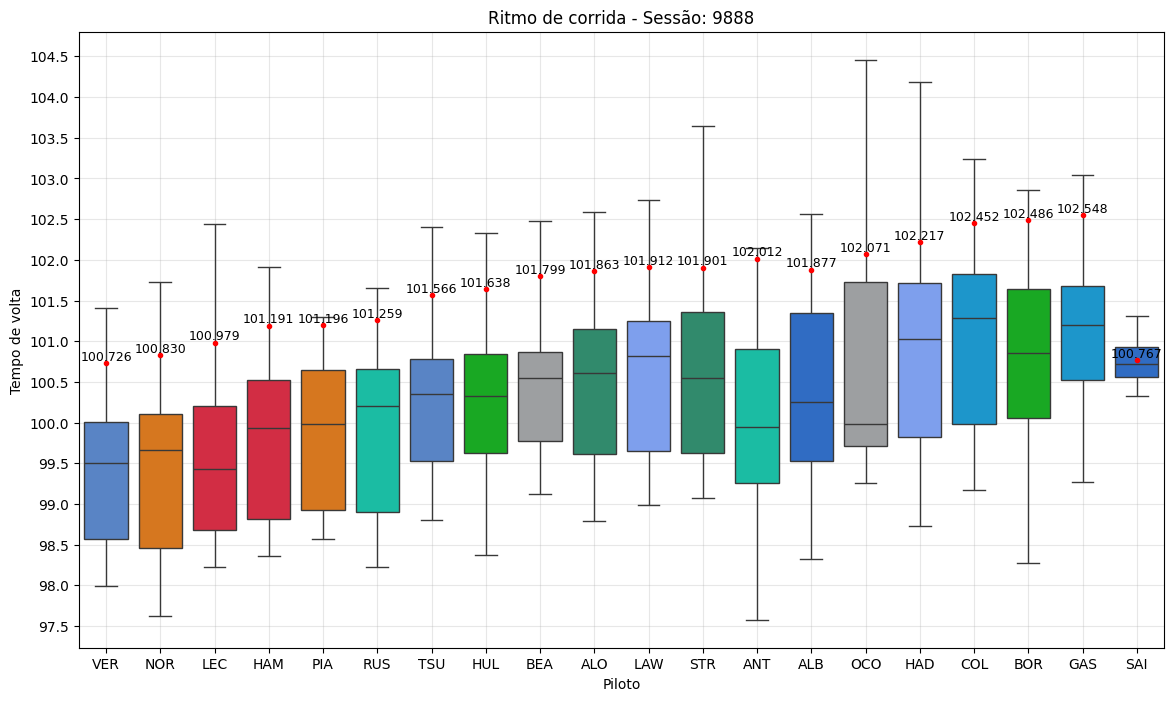

In [10]:
# Cria o gráfico de boxplot com os tempos de volta dos pilotos e a média

# Ordem de chegada dos pilotos
ordem_pilotos = df_voltas_final.sort_values('position_final')['name_acronym'].unique()

# Dicionário mapeando cada piloto para sua cor de equipe
cores_pilotos = dict(zip(df_voltas_final['name_acronym'], df_voltas_final['team_colour']))

plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=df_voltas_final, x='name_acronym', y='lap_duration',
                 order=ordem_pilotos,
                 showfliers=False,
                 showmeans=True,
                 meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red", "markersize": "3"},
                 palette=cores_pilotos,
                 legend=False,
                 hue='name_acronym')

plt.title(f'Ritmo de corrida - Sessão: {session_key}')
plt.xlabel('Piloto')
plt.ylabel('Tempo de volta')
plt.grid(True, alpha=0.3)
ax.yaxis.set_major_locator(MultipleLocator(0.5))  # Define intervalos de 0.5

# Adciona as médias no eixo
medias = df_voltas_final.groupby('name_acronym')['tempo_medio_volta'].first().reindex(ordem_pilotos)

for i, (piloto, media) in enumerate(medias.items()):
    ax.text(i, media, f'{media:.3f}',
            ha='center',
            va='bottom',
            fontsize=9)

plt.show()

In [13]:
# Usando SQL eu filtro os 3 pilotos que fizeram a volta mais rápida

consulta_2 = """

with w_menor_tempo_piloto as (
  select
    name_acronym,
    lap_number,
    min(lap_duration) as lap_duration
  from
    df_voltas_final
  group by
    name_acronym
  order by
    lap_duration asc
)
select
  name_acronym as piloto,
  lap_number as num_volta,
  lap_duration as tempo_volta_rapida
from
  w_menor_tempo_piloto
limit
  3

"""

volta_rapida = pysqldf(consulta_2)
df_volta_rapida = pd.DataFrame(volta_rapida)
df_volta_rapida

,piloto,num_volta,tempo_volta_rapida
0,ANT,33,97.577
1,NOR,35,97.620
2,VER,35,97.991


In [14]:
# Usando sql eu crio uma tabela que me mostra as posições que os pilotos ganharam ou perderam

consulta_3 = """

with w_qualificacao as (
  select
    driver_number as piloto,
    position as posicao_largada
  from
    df_qualificacao
), w_posicao as (
  select
    driver_number as piloto,
    position as posicao_chegada,
    points as pontos
  from
    df_posicao
), w_sigla_piloto as (
  select
    *
  from
    df_piloto_final
)
select
  w3.name_acronym as piloto,
  w1.posicao_largada,
  w2.posicao_chegada,
  case
    when (w1.posicao_largada - w2.posicao_chegada) > 0 then '+' || (w1.posicao_largada - w2.posicao_chegada)
    when (w1.posicao_largada - w2.posicao_chegada) < 0 then '-' || abs(w1.posicao_largada - w2.posicao_chegada)
    else 0
  end as ganho_posicoes,
  cast(w2.pontos as int) as pontos
from
  w_qualificacao w1,
  w_posicao w2,
  w_sigla_piloto w3
where
  w1.piloto = w2.piloto
  and w2.piloto = w3.driver_number

"""

ganho_posicoes = pysqldf(consulta_3)
df_ganho_posicoes = pd.DataFrame(ganho_posicoes)
df_ganho_posicoes

,piloto,posicao_largada,posicao_chegada,ganho_posicoes,pontos
0,VER,1,1.0,0,25
1,NOR,2,2.0,0,18
2,LEC,3,3.0,0,15
3,RUS,4,6.0,-2.0,8
4,HAM,5,4.0,+1.0,12
5,PIA,6,5.0,+1.0,10
6,ANT,7,13.0,-6.0,0
7,BEA,8,9.0,-1.0,2
8,SAI,9,NaN,0,0
9,ALO,10,10.0,0,1


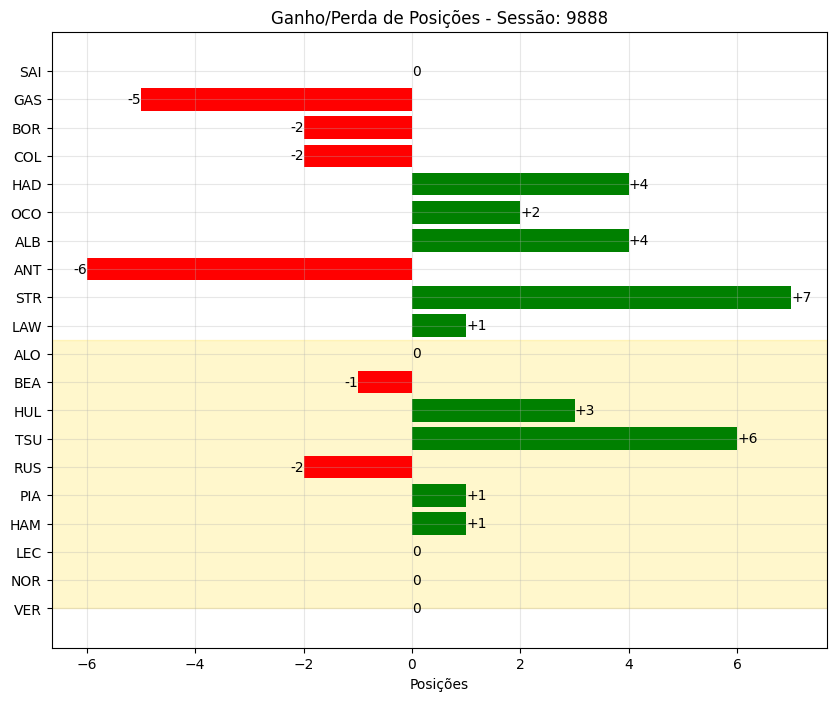

In [15]:
# Gráfico de ganho de posições

# Primeiro, vamos converter a coluna 'ganho_posicoes' para numérico
df_ganho_posicoes['ganho_posicoes_num'] = df_ganho_posicoes['ganho_posicoes'].astype(float)

# Ordenar os dados pela posição de chegada
df_sorted = df_ganho_posicoes.sort_values('posicao_chegada', ascending=True)

# Cria o gráfico
plt.figure(figsize=(10, 8))
plt.axhspan(9.5, 0, alpha=0.2, color='gold') # Criar área de fundo para os 10 primeiros
cores = ['red' if x < 0 else 'green' for x in df_sorted['ganho_posicoes_num']] # Define as cores das barras
bars = plt.barh(df_sorted['piloto'], df_sorted['ganho_posicoes_num'], color=cores) # Define as barras
plt.xlabel('Posições')
plt.title(f'Ganho/Perda de Posições - Sessão: {session_key}')
plt.grid(True, alpha=0.3, )

# Adicionar os valores nas barras
for bar, valor in zip(bars, df_sorted['ganho_posicoes_num']):
    if valor is not None:
      plt.text(bar.get_width(),
              bar.get_y() + bar.get_height()/2,
              f'{valor:+.0f}' if valor != 0 else f'{valor:.0f}',
              ha='left' if valor >= 0 else 'right',
              va='center')

plt.show()